# $ \mbox{Asymptotic methods with SymPy}$

Projectile motion in a non-homogenous potential field is described by the equation

$$y_{\tau \tau} - \frac{1}{(1 + \epsilon y)^2} = 0,$$

with $y(0) = 0$ and $y_{\tau}(0)=1$, and where $\epsilon \ll 1$ is expected.

In [1]:
import sympy as sym
from sympy import init_printing
init_printing() 

In the limit $y \ll a$ the electric field is

$$ E  = 4 \pi k \sigma,$$

which is the same as a the electric field due to an infinite plane of charge. The equation of motion becomes

$$ y_{tt} = \frac{-4 \pi k \sigma q}{m}.$$

This has the analytic solution

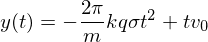

In [2]:
k, sig, q, t, v0, m = sym.symbols('k, sigma, q, t, v0, m')

y = sym.symbols('y', cls=sym.Function)
eqn = sym.Eq(y(t).diff(t,t) + 4*sym.pi*k*sig*q/m)
soln = sym.dsolve(eqn, y(t))
constants = sym.solve([soln.rhs.subs(t,0) - 0,
                      soln.rhs.diff(t).subs(t,0) - v0])
C1, C2 = sym.symbols('C1 C2')
soln = soln.subs(constants)
soln

In [3]:
y0, t0, a, E0 = sym.symbols('y0, t0, a, E0')
y0 = v0**2*m/(q*E0)
t0 = v0*m/(q*E0)
parameter = E0*q*t0**2/(m* y0**3)
parameter = y0*m/(q*E0*t0**2)
y0, t0 
sym.latex(parameter)
parameter

In [4]:
y0 = q*E0*a**2/(m*v0**2)
t0 = q*E0*a**2/(m*v0**3)
parameter = q*E0*a**2/m*t0**2/y0**3
parameter

In [6]:
y, eps, a, b, tau = sym.symbols('y, epsilon, a, b, tau')
y0 = sym.Function('y0')(tau)
y1 = sym.Function('y1')(tau)
y2 = sym.Function('y2')(tau)

In [7]:
y = sym.Eq(y0 + eps*y1 + eps**2*y2) # naive expansion

class f(sym.Function):
    
    @classmethod
    def eval(cls, y):
        return y.lhs.diff(tau,tau) + 1/(1 + eps*y.lhs)**2
        #return y.lhs.diff(tau, tau) + eps/y.lhs**2


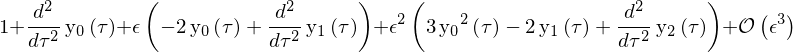

In [8]:
the_series = sym.series(f(y), eps, x0=0, n=3)
by_order = sym.collect(the_series, eps, evaluate=False)
the_series

### $\mathcal{O} \left( 1 \right) \mbox{Solution}$

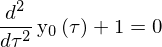

In [9]:
sym.Eq(by_order[1].removeO())

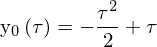

In [10]:
eqn = sym.Eq(by_order[1].removeO())    #1 + y0(tau).diff(tau, tau))
soln0 = sym.dsolve(eqn, y0)
constants = sym.solve([soln0.rhs.subs(tau,0) - 0, \
                      soln0.rhs.diff(tau).subs(tau,0) - 1])
C1, C2 = sym.symbols('C1 C2')
soln0 = soln0.subs(constants)
soln0

### $\mathcal{O} \left( \epsilon \right) \mbox{Solution}$

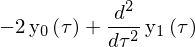

In [11]:
by_order[eps]

Note, this looks like an Autonomous equation.

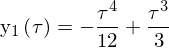

In [14]:
try:
    eqn = sym.Eq(by_order[eps].replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps])
    
soln1 = sym.dsolve(eqn, y1)
constants = sym.solve([soln1.rhs.subs(tau,0) - 0, \
                      soln1.rhs.diff(tau,1).subs(tau,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln1 = soln1.subs(constants)
soln1


### $\mathcal{O} \left( \epsilon^2 \right) \mbox{Solution}$

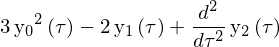

In [15]:
by_order[eps**2]

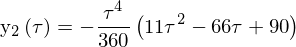

In [16]:
try:
    eqn = sym.Eq(by_order[eps**2].replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**2].replace(y1, soln1.rhs))
    
soln2 = sym.dsolve(eqn, y2)
constants = sym.solve([soln2.rhs.subs(tau,0) - 0, \
                      soln2.rhs.diff(tau,1).subs(tau,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln2 = soln2.subs(constants)
sym.factor(soln2)

Non-linear term in the ODE, could linearize it, or add the numerical solution to the composite solution after lambda-ifying...

### $\mbox{Composite Solution}$

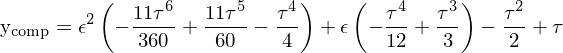

In [17]:
y_comp = sym.symbols('y_{comp}', cls=sym.Function)
try:
    y_comp = sym.Eq(y_comp, soln0.rhs + eps*soln1.rhs + eps**2*soln2.rhs) # + eps**2*soln2.rhs)
except NameError:
    y_comp = sym.Eq(y_comp, eps*soln1.rhs + eps**2*soln2.rhs) # + eps**2*soln2.rhs)
y_comp

### $\mbox{The Trajectory}$

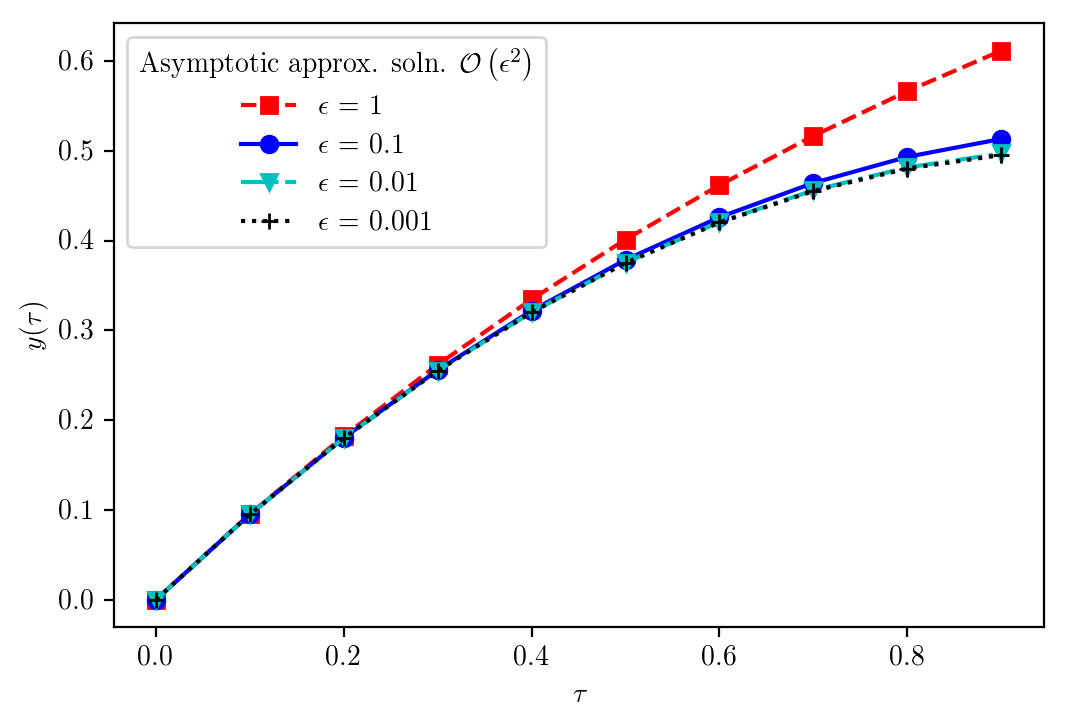

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

eps_val = [.001, .01, .1, 1][::-1]
linestyle = ['rs--', 'bo-', 'cv-.', 'k+:']
tt = sp.arange(0,1,0.1)

plt.figure(figsize=(6, 4), dpi=100)
for keys, vals in enumerate(eps_val):
    y_compP = sym.lambdify(tau, y_comp.rhs.subs(eps, vals), 'numpy')
    plt.plot(tt, y_compP(tt), linestyle[keys],label='$\epsilon$ = {}'.format(vals))
    
plt.ylabel(r'y$(\tau)$')
plt.xlabel(r'$\tau$')
plt.legend(title = r'Asymptotic approx. soln. $\mathcal{O} \left( \epsilon^2 \right)$')
plt.show()